## 00_Start_EDA
### EDA 시작하기

>### 01. 라이브러리 가져오기 Import Libraries
>### 02. 데이터 불러오기 Load Data
>### 03. 데이터 탐색하기 Explore Data
>### 04. 기술통계량 계산하기 Descriptive Statistics
>### 05. 단변량 분석 Univariate Analysis
>### 06. 이변량 분석 Bivariate Analysis
>### 07. 다변량 분석 Multivariate Analysis
>### 08. 이상치 탐지 Outlier Detection
>### 09. 데이터 변환 Data Transformation
>### 10. 결론 Conclusion

---

#### pip와 conda는 모두 파이썬 패키지 관리자입니다. 하지만 두 패키지 관리자는 몇 가지 차이점이 있습니다.

1. 의존성 관리
- pip는 각 패키지의 의존성을 따로 관리합니다. 이는 다른 패키지와 충돌할 수 있는 문제가 발생할 수 있습니다. 따라서, pip를 이용해 패키지를 설치할 때는 의존성을 직접 해결해야 할 수도 있습니다.
- 반면에 conda는 모든 패키지를 하나의 환경에 설치하며, 의존성을 자동으로 관리합니다. 따라서, conda를 사용하면 의존성 문제를 해결하는데 더욱 편리합니다.

2. 운영 체제 지원
- pip는 파이썬 패키지 관리자이므로, 파이썬 패키지만 설치할 수 있습니다. 
- 반면에 conda는 다양한 패키지를 설치할 수 있습니다. 또한, conda는 여러 운영 체제에서 사용할 수 있습니다.

3. 패키지 충돌
- pip는 각 패키지를 따로 설치하기 때문에, 패키지 충돌이 발생할 가능성이 높습니다. 
- conda는 모든 패키지를 하나의 환경에 설치하기 때문에, 충돌이 발생할 가능성이 낮습니다.

4. 속도
- 일반적으로 pip가 conda보다 더 빠릅니다. 하지만, 의존성을 관리해야 할 때는conda가 더 빠른 경우가 있습니다.

따라서, 프로젝트에 따라 pip와 conda를 선택해야 합니다. 파이썬 패키지만 사용할 경우에는 pip를 사용하고, 다양한 패키지를 사용하거나 의존성 문제를 해결해야 할 경우에는 conda를 사용하는 것이 좋습니다.

#### 라이브러리에 충돌이 있는 경우
1. 가상환경을 생성

pip install virtualenv # 가상환경 생성을 위한 라이브러리 설치

virtualenv venv # 가상환경 생성

source venv/bin/activate # 가상환경 활성화

pip install 패키지명 # 필요한 패키지 설치

2. 라이브러리 버전 업데이트

pip install --upgrade 패키지명 #특정 패키지를 업데이트 

pip install --upgrade 패키지명 == 특정버전 #특정 패키지를 특정 버전으로 업데이트 

3. 라이브러리 제거
pip uninstall 패키지명 #불필요한 라이브러리를 제거

### pandas_profiling
import pandas_profiling 
health.profile_report()
- 기본적인 EDA를 한번에 할 수 있도록 padnas의 프로파일링 함수를 이용
- 변수가 많지 않을 때 사용하면 좋다.
- 사분위수(Quantile Statics)
- 기초통계량(Descriptive statics평균(Mean), 중위수(Median), 최빈수(Mode),표준편차(standard Deviation) 등
- 상관관계(Correlations),결촉치(Missing Values)

### 01. 라이브러리 가져오기 및 기타 설정 Import Libraries and other configurations
- pandas(구조화된 데이터(엑셀)를 빠르고 쉽게 다룰수 있도록 설계되어 고급데이터 구조와 관련된 함수를 제공)
- numpy (산술계산과 통계관련작업을 위한 가장 기본이 되는 필수 라이브러리)
- matplotlib(데이터 시각화 라이브러리,박스플롯,산점도,히스토그램 등)
- seaborn(맷플로립을 토대로 돌아가는 고급 데이터 시각화 라이브러리, 상관관계,선형관계,범주형 데이터를 표현하는 등)
- 위에서 필요한 라이브러리를 가져오고 다양한 설정을 합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#한글깨짐 현상 해결(폰트 설정하기)
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Users/my/Desktop/data/nanum-all/나눔 글꼴/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf').get_name()
rc('font', family=font_name)

### 02. 데이터 불러오기 Load Data
- csv / excel / DB / json / html / package data 데이터 타입에 맞는 방법으로 데이터셋을 불러옵니다.
- 기본적으로 pandas의 DataFrame 형태의 데이터셋으로 분석을 진행합니다.
- 인코딩 관련 에러 대응하기(endcoding='cp949','utf-8','utf8-sig')

#### 1. CSV, Excel 파일을 불러오기 위해서는 pandas 라이브러리를 사용, pandas는 read_csv(),excel() 함수를 제공합니다.
df = pd.read_csv('파일명.csv')
Excel 파일 불러오기
df = pd.read_excel('파일명.xlsx', sheet_name='시트명')


#### 2. DB 데이터를 불러오기 위해서는 sqlite3 모듈을 사용하여 SQLite DB를 다룹니다. pymysql이나 psycopg2 등을 사용하여 다른 DB도 다룰 수 있습니다.

import sqlite3
conn = sqlite3.connect('db명.db') #DB 연결

cur = conn.cursor()
cur.execute('SELECT * FROM 테이블명') #쿼리 실행

rows = cur.fetchall() #결과가져오기

#### 3. JSON 파일을 불러오기 위해서는 json 모듈을 사용합니다.
import json

with open('파일명.json', 'r') as f:

    data = json.load(f)

#### 4. HTML 파일을 불러오기 위해서는 beautifulsoup4 라이브러리를 사용합니다.
from bs4 import BeautifulSoup

with open('파일명.html', 'r') as f:

    soup = BeautifulSoup(f, 'html.parser')
    
####  5. 패키지에 포함된 데이터를 불러오기 위해서는 pkg_resources 모듈을 사용합니다.
import pkg_resources

data = pkg_resources.resource_string('패키지명', '파일명') #패키지 데이터 불러오기

In [3]:
health=pd.read_csv('C:/Users/my/Desktop/data/nhis_nhcp_info_20211229.csv',encoding='cp949')
#UnicodeDecodeError"'utf-8' 코덱이 위치 0의 바이트 0xb1을 디코딩할 수 없습니다: 잘못된 시작 바이트"

### 03. 데이터 탐색하기 Explore Data
- 데이터셋의 형태, 열, 데이터 타입, 결측치 등을 살펴봄으로써 데이터에 대한 개요를 파악합니다.

In [4]:
health.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [5]:
#변수명 바꾸기
health=health.rename(columns={"기준년도":'year',"가입자 일련번호":'id',"시도코드":'sido',"성별코드":'sex',"연령대 코드(5세단위)":'age_group',"신장(5Cm단위)":'height',"체중(5Kg 단위)":'weight',"허리둘레":'waist',"시력(좌)":'sight_l',"시력(우)":'sight_r',"청력(좌)":'hear_l', "청력(우)":'hear_r',
                              "수축기 혈압":'bp_high' ,"이완기 혈압":'bp_lwst' ,"식전혈당(공복혈당)":'blds' ,
                              "총 콜레스테롤":'tot_chole' ,"트리글리세라이드":'trigliserida' ,"HDL 콜레스테롤":'hdl',"LDL 콜레스테롤":'ldl' ,
                              "혈색소":'hmg',"요단백":'orig_prote_cd',"혈청크레아티닌":'creatine',"(혈청지오티)AST":'sqot_ast',"(혈청지오티)ALT":'srpt_alt',"감마 지티피":'g_gpt',"흡연상태":'smk',"음주여부":'drk',"구강검진 수검여부":'hichk_oe_inspec_yn',"치아우식증유무":'crs_yn',"치석":'ttr_yn',"데이터 공개일자":'date_std_dt'}) 

In [6]:
print("데이터 모형 \t")
print(health.shape)

print("\n컬럼별 타입,null값 존재여부")
print(health.info())

데이터 모형 	
(1000000, 31)

컬럼별 타입,null값 존재여부
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   year                1000000 non-null  int64  
 1   id                  1000000 non-null  int64  
 2   sido                1000000 non-null  int64  
 3   sex                 1000000 non-null  int64  
 4   age_group           1000000 non-null  int64  
 5   height              1000000 non-null  int64  
 6   weight              1000000 non-null  int64  
 7   waist               999892 non-null   float64
 8   sight_l             999743 non-null   float64
 9   sight_r             999748 non-null   float64
 10  hear_l              999778 non-null   float64
 11  hear_r              999770 non-null   float64
 12  bp_high             992468 non-null   float64
 13  bp_lwst             992466 non-null   float64
 14  blds                99239

# 데이터 형변환 방법
-- (신장변수와 체중변수를 형변환?굳이 필요는 없는것 같아서 그대로 진행)
- int() 함수는 문자열이나 실수를 정수형으로 변환
- float() 함수는 문자열이나 정수를 실수형으로 변환
- str() 함수는 다른 자료형을 문자열로 변환
- astype() 메서드 사용: 판다스(Pandas) 라이브러리의 데이터프레임(DataFrame)이나 시리즈(Series) 객체에서는 astype() 메서드를 사용하여 데이터 형변환 가능
- to_numeric() 함수 사용: 판다스(Pandas) 라이브러리의 to_numeric() 함수는 문자열로 저장된 숫자를 숫자형으로 변환


In [7]:
print("\성별 변수 타입")
print(health['sex'].dtypes)

print("\n거주 지역 목록")
print(list(set(health['sido'])))

print("\n수진자 연령대")
print(list(set(health['age_group'])))


\성별 변수 타입
int64

거주 지역 목록
[36, 41, 42, 11, 44, 43, 46, 47, 48, 45, 49, 26, 27, 28, 29, 30, 31]

수진자 연령대
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [8]:
health['sex'] = health['sex'].astype('object')
health['age_group']= health['age_group'].astype('object')

In [58]:
from scipy.stats import skew, kurtosis
health.iloc[:,5:-1].apply(['skew', 'kurtosis']).T


,skew,kurtosis
height,0.008631,-0.480053
weight,0.576457,0.539166
waist,1.218992,96.357375
sight_l,10.333825,142.924765
sight_r,10.337073,141.315510
hear_l,4.742129,23.494161
hear_r,4.862028,24.778855
bp_high,-2.022635,14.783997
bp_lwst,-1.662630,11.241309
blds,3.155005,29.573173


- 왜도는 수치가 좌우로 치우쳐진 정도를 나타냄
왜도가 양수 - 분포가 왼쪽으로 치우치고 오른쪽으로 긴 꼬리 분포(중앙값>평균),
왜도가 음수 - 분포가 오른쪽으로 치우치고 왼쪽으로 긴 꼬리 분포(중앙값<평균)

- 첨도는 분포가 정규분포보다 얼마나 뾰족하거나(데이터가 몰려있음) 완만한지(데이터가 두루 퍼져있음)의 정도를 나타내는 척도
첨도가 기준보다 크면 양의 첨도(급첨), 작으면 음의첨도(완첨)

- 왜도가 0 첨도가 1일 경우 완전한 정규분포라고 봅니다.


In [10]:
from scipy.stats import mode, skew, kurtosis
#최빈값
health.iloc[:,5:-1].apply(mode)

,height,weight,waist,sight_l,sight_r,hear_l,hear_r,bp_high,bp_lwst,blds,...,orig_prote_cd,creatine,sqot_ast,srpt_alt,g_gpt,smk,drk,hichk_oe_inspec_yn,crs_yn,ttr_yn
0,[160],[60],[80.0],[1.0],[1.0],[1.0],[1.0],[130.0],[80.0],[96.0],...,[1.0],[0.8],[22.0],[16.0],[15.0],[1.0],[1.0],[0],[nan],[nan]
1,[184993],[158678],[38198],[202138],[206683],[955154],[957287],[63669],[103661],[33258],...,[914825],[192871],[61223],[46889],[39958],[626138],[584685],[668616],[668617],[668618]


In [11]:
print("성별 고유값의 개수")
print(health['sex'].value_counts())
print("\n시도코드 고유값의 개수")
print(health['sido'].value_counts())
print("\n연령대 코드 고유값의 개수")
print(health['age_group'].value_counts().sort_index(ascending=False))

성별 고유값의 개수
1    510689
2    489311
Name: sex, dtype: int64

시도코드 고유값의 개수
41    247369
11    166231
26     69025
48     68530
28     58345
47     54438
27     48413
44     42582
45     38066
46     38041
43     34009
42     32023
30     30057
29     28532
31     26001
49     11878
36      6460
Name: sido, dtype: int64

연령대 코드 고유값의 개수
18      6237
17     23401
16     36663
15     73714
14     86653
13    155096
12    142089
11    175705
10    144165
9     156277
Name: age_group, dtype: int64


### 목적 1
#### 성별,나이,비만도,트리글리세라이드,총콜레스테롤,LDL,HDL - 고지혈증여부


### 파생변수생성(BMI 기준,콜레스테롤 기준 수치,고지혈증여부)

In [12]:
health['height(m)']=health['height']/100# cm를 m로 변환
health['bmi']= round(health['weight'] / health['height(m)']** 2,1)
health['bmi_standard'] = health['bmi'].apply(lambda x: 'under' if x <= 18.5 else ('normal' if x <= 22.9 else ('over' if x <= 24.9 else 'obese')))
#BMI가 18.5 이하면 저체중 ／ 18.5 ~ 22.9 사이면 정상 ／ 23.0 ~ 24.9 사이면 과체중 ／ 25.0 이상부터는 비만으로 판정.

In [13]:
# 파생 변수 추가
health['chole_cate'] = health['tot_chole'].apply(lambda x: 'nomal' if x < 200 else ('warning' if x < 240 else 'danger'))
health['ldl_cate'] = health['ldl'].apply(lambda x: 'nomal' if x < 130 else ('warning' if x < 160 else 'danger'))
health['hdl_cate'] = health['hdl'].apply(lambda x: 'nomal' if x >= 40 else 'danger')

# 결과 출력
print(health)

        year       id  sido sex age_group  height  weight  waist  sight_l  \
0       2020        1    36   1         9     165      60   72.1      1.2   
1       2020        2    27   2        13     150      65   81.0      0.8   
2       2020        3    11   2        12     155      55   70.0      0.6   
3       2020        4    31   1        13     160      70   90.8      1.0   
4       2020        5    41   2        12     155      50   75.2      1.5   
...      ...      ...   ...  ..       ...     ...     ...    ...      ...   
999995  2020   999996    41   2        13     145      55   81.0      0.9   
999996  2020   999997    26   2        12     160      55   76.5      1.5   
999997  2020   999998    48   1         9     175      70   85.0      1.2   
999998  2020   999999    48   2         9     160      70   91.0      0.6   
999999  2020  1000000    28   1        11     160      55   76.1      2.0   

        sight_r  ...  hichk_oe_inspec_yn  crs_yn  ttr_yn  date_std_dt  \
0 

In [14]:
health.loc[(health['tot_chole'] >= 240) & (health['ldl']>= 160) & (health['hdl'] <= 40), 'hyperlipidemia'] = 1 #고지혈증 있음
health.loc[(health['tot_chole'] < 240) | (health['ldl'] < 160) | (health['hdl'] > 40), 'hyperlipidemia'] = 0 #없음
print(health)

        year       id  sido sex age_group  height  weight  waist  sight_l  \
0       2020        1    36   1         9     165      60   72.1      1.2   
1       2020        2    27   2        13     150      65   81.0      0.8   
2       2020        3    11   2        12     155      55   70.0      0.6   
3       2020        4    31   1        13     160      70   90.8      1.0   
4       2020        5    41   2        12     155      50   75.2      1.5   
...      ...      ...   ...  ..       ...     ...     ...    ...      ...   
999995  2020   999996    41   2        13     145      55   81.0      0.9   
999996  2020   999997    26   2        12     160      55   76.5      1.5   
999997  2020   999998    48   1         9     175      70   85.0      1.2   
999998  2020   999999    48   2         9     160      70   91.0      0.6   
999999  2020  1000000    28   1        11     160      55   76.1      2.0   

        sight_r  ...  crs_yn  ttr_yn  date_std_dt  height(m)   bmi  \
0    

In [15]:
health.groupby(['sex', 'age_group'])['tot_chole'].count()

sex  age_group
1    9            45738
     10           23869
     11           23396
     12           21931
     13           41440
     14           15215
     15           11160
     16            7253
     17            6471
     18             639
2    9            39500
     10           22837
     11           24652
     12           23750
     13           47654
     14           17204
     15           12436
     16            8302
     17            7695
     18            1164
Name: tot_chole, dtype: int64

### 05. 단변량 분석 Univariate Analysis
- 히스토그램, 박스플롯 등을 그려 각 변수를 개별적으로 분석합니다.
- 각 변수의 특성과 분포들을 파악할 수 있습니다.(변수에 따라 통계적 유의성 검정도 진행할 수 있음)

In [16]:
sns.set(rc={'figure.figsize':(10,10)})

<Axes: xlabel='tot_chole', ylabel='Count'>

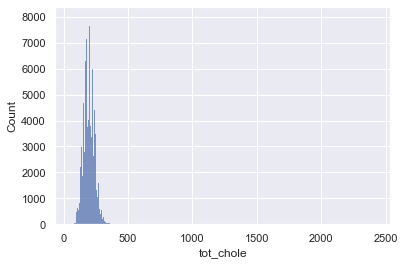

In [17]:
sns.histplot(health['tot_chole'])

<Axes: xlabel='hdl', ylabel='Count'>

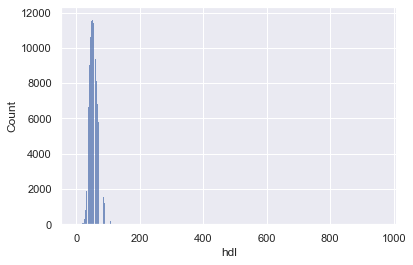

In [18]:
sns.histplot(health['hdl'])

<Axes: xlabel='ldl', ylabel='Count'>

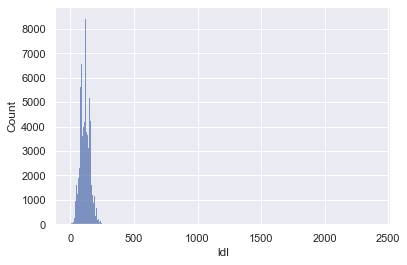

In [19]:
sns.histplot(health['ldl'])

<Axes: xlabel='trigliserida', ylabel='Count'>

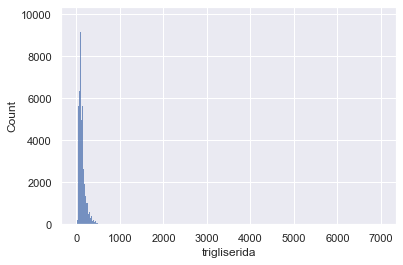

In [20]:
sns.histplot(health['trigliserida'])

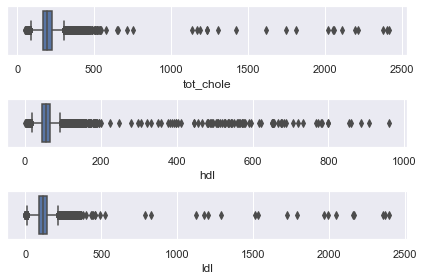

'tot_chole,HDL,LDL변수 변수에 이상치가 많이 포함되어 있다.\n이상값을 처리해야할것같다.'

In [21]:
plt.subplot(3, 1, 1)
sns.boxplot(x='tot_chole', data=health)

plt.subplot(3, 1, 2)               
sns.boxplot(x='hdl', data=health)

plt.subplot(3, 1, 3)                
sns.boxplot(x='ldl', data=health)

plt.tight_layout()
plt.show()

'''tot_chole,HDL,LDL변수 변수에 이상치가 많이 포함되어 있다.
이상값을 처리해야할것같다.'''

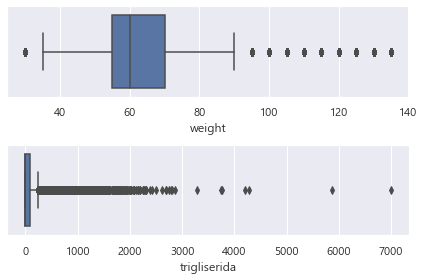

In [59]:
plt.subplot(2, 1, 1)  
sns.boxplot(x='weight', data=health)

plt.subplot(2, 1, 2) 
sns.boxplot(x='trigliserida', data=health)

plt.tight_layout()
plt.show()

- weight,트리글리세라이드 변수에 이상치가 많이 포함되어 있다.
이상값을 처리해야할것같다.


In [23]:
print(health.groupby('sex')['tot_chole','trigliserida'].describe())
print(health.groupby('sex')['ldl','hdl'].describe())

    tot_chole                                                            \
        count        mean        std   min    25%    50%    75%     max   
sex                                                                       
1    197112.0  195.263358  43.506887  54.0  166.0  194.0  222.0  2193.0   
2    205194.0  201.526282  42.699673  54.0  173.0  199.0  227.0  2416.0   

    trigliserida                                                           
           count        mean         std  min   25%    50%    75%     max  
sex                                                                        
1       197121.0  153.594076  118.249689  4.0  86.0  125.0  184.0  5869.0  
2       205201.0  114.858434   73.693627  2.0  70.0   97.0  139.0  6999.0  
          ldl                                                          \
        count        mean        std  min   25%    50%    75%     max   
sex                                                                     
1    190862.0  113.835729

'''총 콜레스테롤 , 트리글리세라이드,LDL 콜레스테롤 1000을 넘어가는 수치가 많음
HDL 콜레스테롤 최댓값 960 현실실적이지 않은 수치가 존재'''

<Axes: xlabel='chole_cate', ylabel='count'>

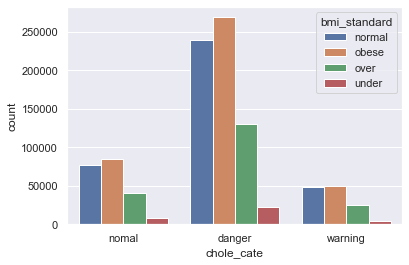

In [24]:
sns.countplot(data = health, x= 'chole_cate', hue = 'bmi_standard')

- BMi기준이 비만인 사람이 콜레스테롤 위험인 사람이 많다.

<Axes: xlabel='hyperlipidemia', ylabel='count'>

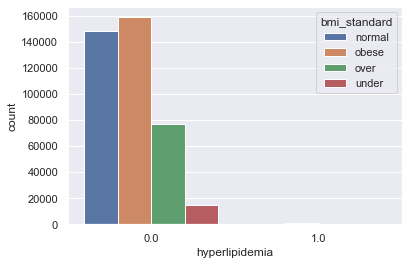

In [25]:
sns.countplot(data = health, x= 'hyperlipidemia', hue = 'bmi_standard')

- BMi기준이 비만인 사람이 콜레스테롤 위험인 사람이 많다

<Axes: xlabel='sex', ylabel='count'>

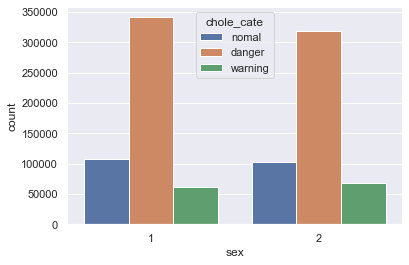

In [26]:
sns.countplot(data = health,  x= 'sex', hue = 'chole_cate')

- 여성보다 남성이 콜레스테롤 수치가 위험인 사람이 더 많다.

### 06. 이변량 분석 Bivariate Analysis
- 산점도, 히트맵 등을 그려 두 변수 간의 관계를 분석합니다.
- 상관분석 / 회귀분석 등 또한 진행할 수 있습니다.
- 독립변수(x)와 종속변수(y)의 관계 혹은 독립변수(x1)와 독립변수(x2) 등 다양한 관계를 볼 수 있습니다.

<Axes: xlabel='sex', ylabel='trigliserida'>

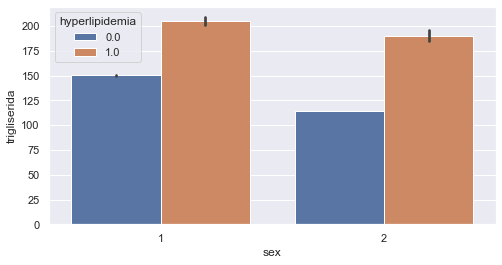

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(data=health, x='sex', y='trigliserida', hue='hyperlipidemia')

- 성별이 남성인 사람이 중성지방이 많고,고지혈증이 있는 사람이 많다.

In [28]:
from scipy.stats import chi2_contingency

# 연령대와 고지혈증 여부 카이제곱 검정 실행
crosstab = pd.crosstab(health['age_group'], health['hyperlipidemia'])
chi2, p, dof, ex = chi2_contingency(crosstab)
print("chi2-statistic: ", chi2)
print("p-value: ", p)


chi2-statistic:  86.85848343851364
p-value:  6.935858815031033e-15


'''카이제곱 검정 결과, chi2-statistic 값이 86.86이고 p-value 값이 6.94e-15로 나왔습니다.
p-value 값은 유의수준(alpha)과 비교하여 작을수록 귀무가설을 기각할 수 있는 강력한 증거가 된다는 것을 의미
여기서 p-value가 매우 작으므로 귀무가설을 기각. 따라서, 연령대와 고지혈증여부 서로 독립적이지 않은 관계에 있다고 할 수 있습니다.
따라서, 연령대와 고지혈증여부에는 유의한 관계가 있으며, 이 관계를 더 자세히 알아보기 위해서는 추가적인 분석이 필요합니다.'''

In [29]:
# bmi지수기준과 고지혈증 여부 카이제곱 검정 실행
crosstab = pd.crosstab(health['bmi_standard'], health['hyperlipidemia'])
chi2, p, dof, ex = chi2_contingency(crosstab)
print("chi2-statistic: ", chi2)
print("p-value: ", p)

chi2-statistic:  432.087043620864
p-value:  2.4786656762555877e-93



'''카이제곱 검정 결과, 통계량 chi2-statistic 값이 407,.36이고, p-value 값이 5.63e-86으로 매우 작게 나왔습니다.
p-value가 매우 작으므로 귀무가설을 기각. 따라서, bmi지수와 고지혈증여부는 서로 독립적이지 않은 관계에 있다고 할 수 있습니다.
따라서, bmi지수기준과 고지혈증여부 간에는 유의한 관계가 있다.
'''

In [30]:
#성별과 고지혈증 여부 카이제곱 검정 실행
crosstab = pd.crosstab(health['sex'], health['hyperlipidemia'])
chi2, p, dof, ex = chi2_contingency(crosstab)
print("chi2-statistic: ", chi2)
print("p-value: ", p)

chi2-statistic:  389.15860994196856
p-value:  1.2619710582723307e-86


'''카이제곱 검정 결과, 통계량 chi2-statistic 값이 389.16이고, p-value 값이 1.26e-86으로 매우 작게 나왔습니다.
p-value가 매우 작으므로 귀무가설을 기각. 따라서, 성별과 고지혈증여부는 서로 독립적이지 않은 관계에 있다고 할 수 있습니다.
따라서, 성별과 고지혈증여부 간에는 유의한 관계가 있다.

<Axes: xlabel='hdl', ylabel='ldl'>

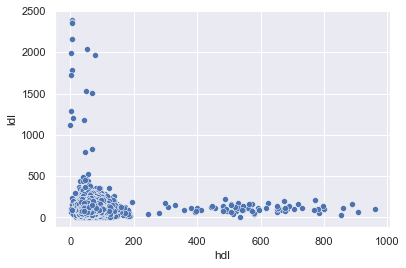

In [31]:
#산점도를 통해 두 변수 간의 관계가 선형인지 비선형인지 확인하여 방향성과 강도를 파악
sns.scatterplot(x='hdl', y='ldl', data=health)

- hdl이 0-200사이와 ldl이0-500사이에 많이 몰려있다.

<Axes: xlabel='bmi', ylabel='trigliserida'>

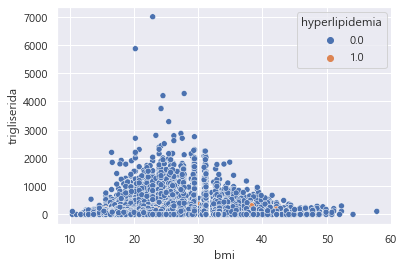

In [60]:
sns.scatterplot(data=health, x='bmi', y='trigliserida', hue='hyperlipidemia')

- 고지혈증여부인 사람의 bmi지수가 30,40에 존재하고 트리글리세이드도 높게 나타난다.

In [61]:
health.corr(method='pearson')
print(health['weight'].corr(health['trigliserida']))


0.10288679406200293


- 체중과 트리글리세라이드 수치 사이에 약한 양의 선형 관계가 있음

In [34]:
health.corr(method='pearson')
print(health['tot_chole'].corr(health['hyperlipidemia']))
print(health['ldl'].corr(health['hyperlipidemia']))
print(health['hdl'].corr(health['hyperlipidemia']))
print(health['trigliserida'].corr(health['hyperlipidemia']))


0.12498467437531216
0.14776529763742188
-0.08776616994804098
0.05481169398289889


- 총 콜레스테롤과 고지혈증여부 사이에 약한 양의 선형 관계가 있음
- LDL콜레스테롤과 고지혈증여부 사이에 약한 양의 선형 관계가 있음
- HDL콜레스테롤과 고지혈증여부 사이에 약한 음의 선형 관계가 있음
- 트리글세라이다와 고지혈증여부 사이에 약한 양의 선형 관계가 있음

### 07. 다변량 분석 Multivariate Analysis
- pairplot, 히트맵 등을 그려 두 변수 이상 간의 관계를 분석합니다.
- 회귀분석, 군집분석, 분산분석, 구조방정식 모델링 등 분석방법을 적용할 수 있습니다. 
- 상관계수 0.7기준으로 다중공선성을 확인하여 주성분분석(PCA) 등 적합한 방법을 통해 변수를 선택합니다.

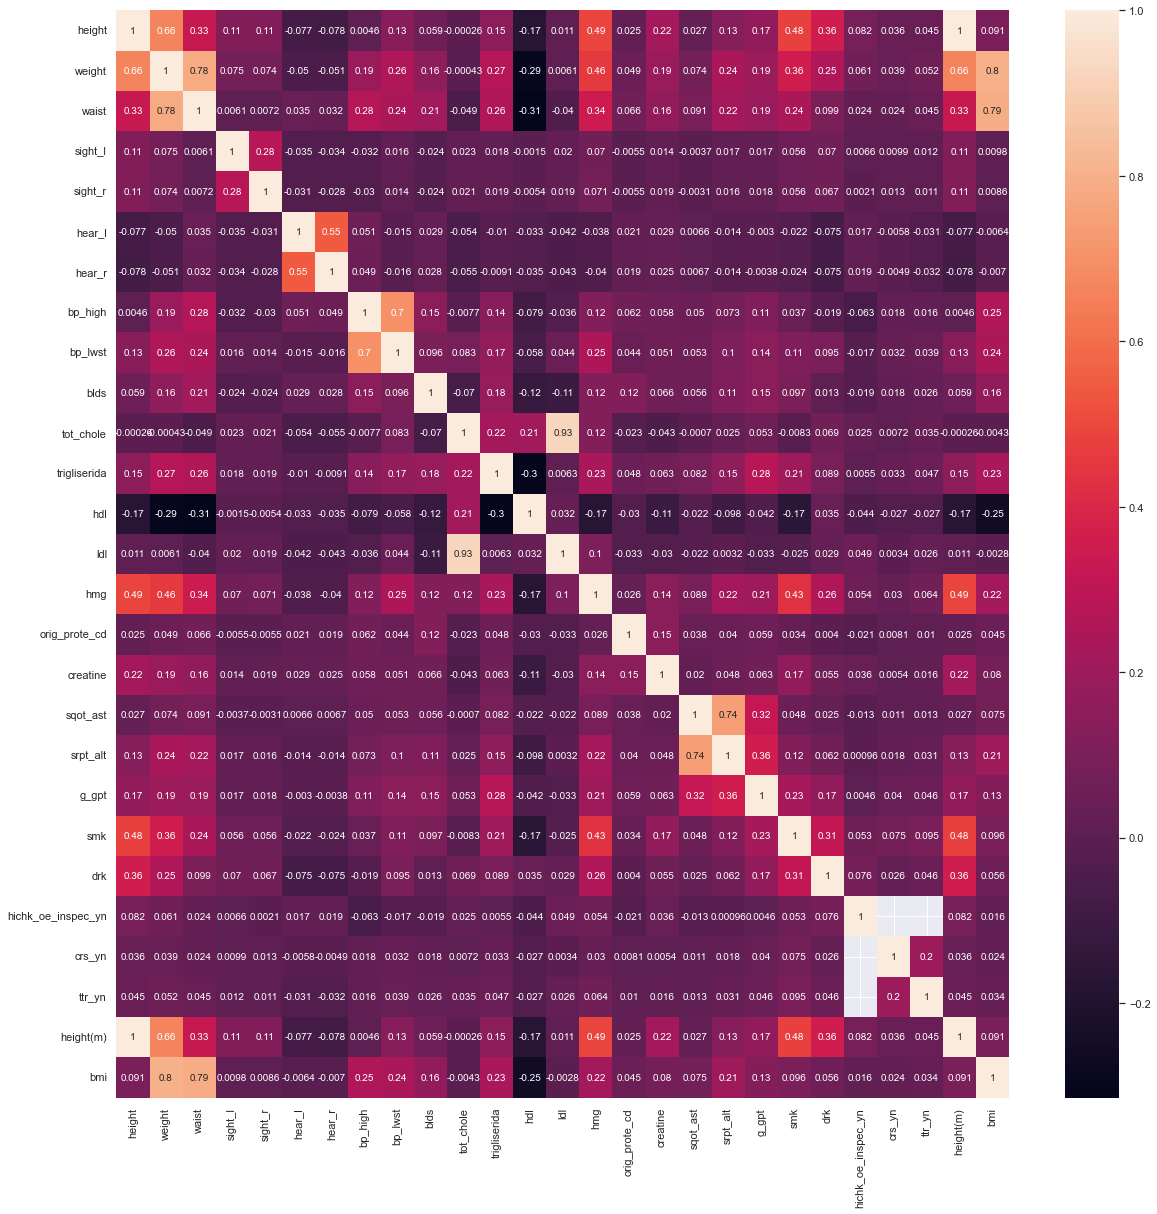

In [35]:
# 히트맵으로 상관관계 표시
plt.figure(figsize = (20,20))
sns.heatmap(health.iloc[:,5:-1].corr(), annot = True,annot_kws={"size": 10})
plt.show()

'''몸무게와 허리둘레,수축기혈압과 이완기혈압,(혈청지오티)AST와 (혈청지오티)ALT는 상관관계가 높다 '''

In [36]:
#sns.pairplot(data=health, vars=['sex', 'age_group', 'bmi','trigliserida'], hue='hyperlipidemia')

In [37]:
#로지스틱회귀분석 (OLS로하는 방법도 추가 공부)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()

health.fillna(0, inplace=True)

X = health[['sex', 'age_group', 'bmi','trigliserida']]
y = health['hyperlipidemia']
# train data와 test data로 구분 (7:3 비율)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
print('훈련 데이터: ', X_train.shape)
print('검증 데이터:', X_test.shape)

# X_train 훈련시키기
lr.fit(X_train,y_train)

# 결정계수(R제곱) 조회하기 
r_square = lr.score(X_test, y_test)

# 기울기
print("회귀식의 기울기 (a)", lr.coef_)

# y 절편
print("회귀식의 y절편 (b)", lr.intercept_)

훈련 데이터:  (700000, 4)
검증 데이터: (300000, 4)
회귀식의 기울기 (a) [[-0.58563496 -0.02723522  0.0886492   0.0033676 ]]
회귀식의 y절편 (b) [-7.53022171]


##### 회귀식
hyperlipidemia = -0.58563496 * 'sex' -0.02723522 * 'age_group' + 0.0886492 *'bmi'+ 0.0033676 * 'trigliserida' -7.53022171
 
- 성별에 따라,연령대가 높아질수록 고지혈증여부 가능성 있음 
- BMI가 높을수록,중성지방 수치가 높을수록 총 콜레스테롤 고지혈증여부 가능성 있음 

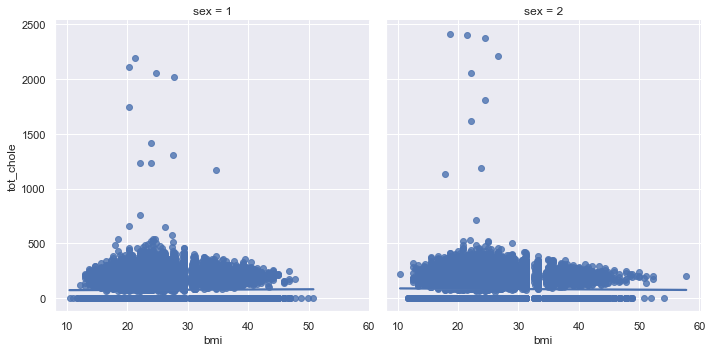

In [38]:
sns.lmplot(data=health, x="bmi", y="tot_chole", col="sex")

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif ["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values ("VIF Factor"). reset_index(drop=True)
vif

,VIF Factor,features
0,1.363040,trigliserida
1,8.614004,sex
2,20.371145,bmi
3,21.682438,age_group


- VIF 값(분산팽창지수) 이 10이상(엄격히는 5이상)인 경우, 다중공선성 있다고 판단

- 다중공선성을 가지는 독립변수를 하나씩 제거 -> 상관분석에서 상관계수가 0.9 이상인 두 개의 변수를 찾아 먼저 제거해보는 것이 좋습니다. 독립변수를 하나씩 제거하는 과정에서 설명력이 어떻게 변화는지를 체크한 후, 설명력이 유지되거나, 높아지는 변수를 제거합니다.

- PCA를 통해 주성분으로 차원을 감소시켜 다중공선성 문제를 해결 

In [40]:
#주성분분석
# PCA를 위한 라이브러리
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 독립 변수들을 표준화
x = health[['weight', 'bmi', 'trigliserida']]
x = StandardScaler().fit_transform(x)

In [41]:
# PCA 모델 적용
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# 주성분으로 이루어진 데이터프레임 생성
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

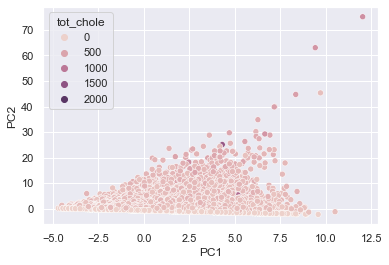

In [42]:
# 데이터프레임 합치기
final_df = pd.concat([principal_df, health[['tot_chole']]], axis = 1)

# 산점도 그리기
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', hue='tot_chole', data=final_df)
plt.show()

### 08. 이상치 탐지 Outlier Detection
- 데이터셋에서 이상치를 탐지하고 적절히 처리합니다.

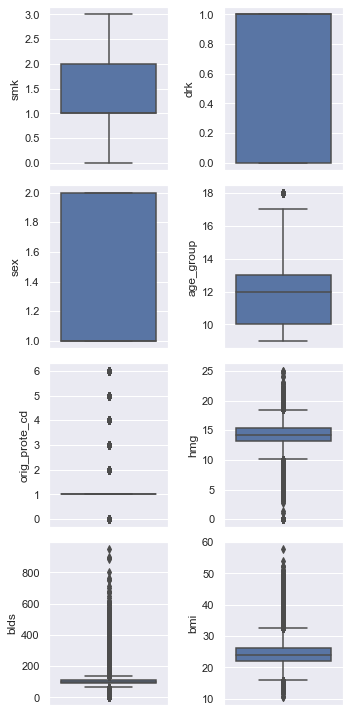

In [43]:
fig, axes = plt.subplots(4,2, figsize = (5,10))

sns.boxplot(y = health['smk'], ax = axes[0][0])
sns.boxplot(y = health['drk'], ax = axes[0][1])

sns.boxplot(y = health['sex'], ax = axes[1][0])
sns.boxplot(y = health['age_group'], ax = axes[1][1])

sns.boxplot(y = health['orig_prote_cd'], ax = axes[2][0])
sns.boxplot(y = health['hmg'], ax = axes[2][1])

sns.boxplot(y = health['blds'], ax = axes[3][0])
sns.boxplot(y = health['bmi'], ax = axes[3][1])

plt.tight_layout()
plt.show()


In [44]:
q1 = titanic['age'].quantile(0.25)
q3 = titanic['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

NameError: name 'titanic' is not defined

In [ ]:
titanic.loc[titanic['age'] < lower_bound, 'age'] = titanic['age'].median()
titanic.loc[titanic['age'] > upper_bound, 'age'] = titanic['age'].median()

# 목적2
### 성별, 연령,단백뇨에 따라 혈색소

# 03. 데이터 탐색하기 Explore Data

In [45]:
he=health[['sex','age_group','orig_prote_cd','hmg','smk','drk']]
print(he)

        sex  age_group  orig_prote_cd   hmg  smk  drk
0         1          9            1.0  15.0  1.0  0.0
1         2         13            1.0  12.7  1.0  0.0
2         2         12            1.0  12.8  1.0  0.0
3         1         13            1.0  16.4  1.0  0.0
4         2         12            1.0  12.4  1.0  0.0
...     ...        ...            ...   ...  ...  ...
999995    2         13            1.0  13.6  1.0  0.0
999996    2         12            1.0  14.0  1.0  1.0
999997    1          9            1.0  16.0  1.0  1.0
999998    2          9            1.0  11.9  1.0  0.0
999999    1         11            1.0  14.9  2.0  0.0

[1000000 rows x 6 columns]


In [46]:
he.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   sex            1000000 non-null  int64  
 1   age_group      1000000 non-null  int64  
 2   orig_prote_cd  1000000 non-null  float64
 3   hmg            1000000 non-null  float64
 4   smk            1000000 non-null  float64
 5   drk            1000000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 45.8 MB


# 04. 기술통계량 계산하기 Descriptive Statistics

In [47]:
he.describe()

,sex,age_group,orig_prote_cd,hmg,smk,drk
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.489311,11.917757,1.108707,14.101311,1.556887,0.584685
std,0.499886,2.171036,0.505551,1.980435,0.784138,0.492777
min,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,1.000000,13.200000,1.000000,0.000000
50%,1.000000,12.000000,1.000000,14.200000,1.000000,1.000000
75%,2.000000,13.000000,1.000000,15.300000,2.000000,1.000000
max,2.000000,18.000000,6.000000,25.000000,3.000000,1.000000


In [48]:
he['orig_prote_cd'].describe() 

count    1000000.000000
mean           1.108707
std            0.505551
min            0.000000
25%            1.000000
50%            1.000000
75%            1.000000
max            6.000000
Name: orig_prote_cd, dtype: float64

In [49]:
# 성별에 따른 혈색소 수치 평균
sex_mean=he.groupby('sex')['hmg'].mean()
# 흡연여부에 따른 혈색소 수치 평균
smk_mean=he.groupby('smk')['hmg'].mean()
# 음주여부에 따른 혈색소 수치 평균
drk_mean=he.groupby('drk')['hmg'].mean()

print("성별에 따른 혈색소 수치 평균", sex_mean)
print("\n흡연여부에 따른 혈색소 수치 평균", smk_mean)
print("\n음주여부에 따른 혈색소 수치 평균", drk_mean)

성별에 따른 혈색소 수치 평균 sex
1    15.066124
2    13.094346
Name: hmg, dtype: float64

흡연여부에 따른 혈색소 수치 평균 smk
0.0    14.300292
1.0    13.549787
2.0    14.895453
3.0    15.160190
Name: hmg, dtype: float64

음주여부에 따른 혈색소 수치 평균 drk
0.0    13.530672
1.0    14.506650
Name: hmg, dtype: float64


- 남성의 경우 13-16.6g/dL, 여성은 12-15.5g/dL가 정상이다.

# 05. 단변량 분석 Univariate Analysis

In [50]:
#일원분산분석
import pandas as pd

# 데이터 불러오기
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 분산분석 모델 만들기
model = ols('hmg ~ age_group', data=he).fit()

# 분산분석 결과 출력하기
result = sm.stats.anova_lm(model, typ=2)
print(result)

                 sum_sq        df             F  PR(>F)
age_group  1.736342e+05       1.0  46321.078792     0.0
Residual   3.748485e+06  999998.0           NaN     NaN


age_group 이라는 변수에 대한 회귀분석에서 추정된 모델의 총 변동을 나타내는 항목인 sum_sq가 1.736342e+05이며, 자유도(df)가 1입니다. 즉, age_group 변수가 종속 변수에 미치는 영향이 있는지를 검정한 결과 F 값이 46321.078792으로 age_group 변수가 종속 변수에 매우 유의한 영향을 미친다는 것을 나타냅니다. PR(>F) 값이 0.0으로 나왔는데, 이는 age_group 변수가 종속 변수에 유의한 영향을 미치는 것으로 해석할 수 있습니다.

# 06. 이변량 분석 Bivariate Analysis

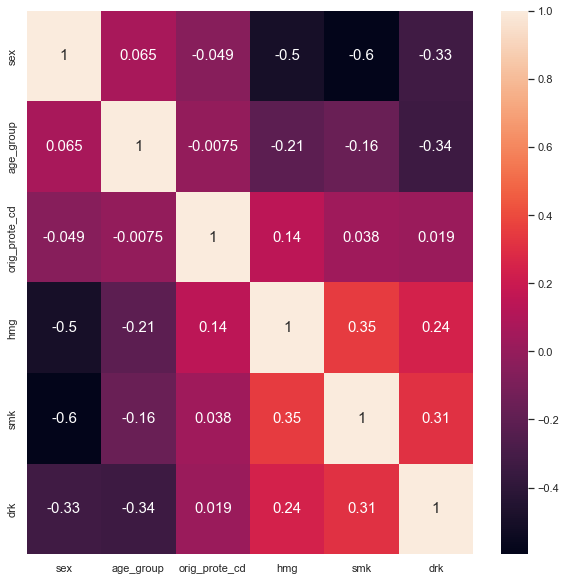

In [51]:
# 히트맵으로 상관관계 표시
plt.figure(figsize = (10,10))
sns.heatmap(he.corr(), annot = True,annot_kws={"size": 15})
plt.show()

In [52]:
he.corr()

,sex,age_group,orig_prote_cd,hmg,smk,drk
sex,1.000000,0.065388,-0.048974,-0.497701,-0.595787,-0.325475
age_group,0.065388,1.000000,-0.007470,-0.210406,-0.162530,-0.335344
orig_prote_cd,-0.048974,-0.007470,1.000000,0.142848,0.038316,0.019226
hmg,-0.497701,-0.210406,0.142848,1.000000,0.347550,0.242845
smk,-0.595787,-0.162530,0.038316,0.347550,1.000000,0.313222
drk,-0.325475,-0.335344,0.019226,0.242845,0.313222,1.000000


- sex 변수는 hmg, smk, drk 변수들과 강한 음의 상관관계를 가집니다.
- age_group 변수는 sex 변수와 약한 양의 상관관계를 나머지 변수와는 음의 상관관계를 가집니다.
- orig_prote_c 변수는  sex,age_group 변수들 음의 상관관계를 hmg,smk.drk는 약한 양의 상관관계를 가집니다.

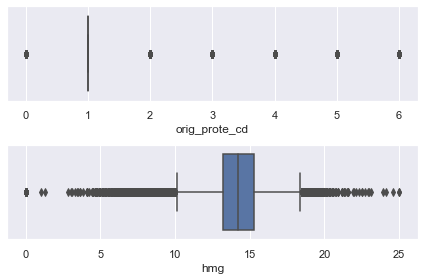

In [53]:
plt.subplot(2, 1, 1)  
sns.boxplot(x='orig_prote_cd', data=he)

plt.subplot(2, 1, 2) 
sns.boxplot(x='hmg', data=he)

plt.tight_layout()
plt.show()

<Axes: xlabel='age_group', ylabel='hmg'>

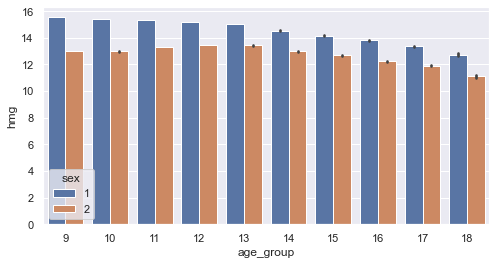

In [54]:
plt.figure(figsize=(8,4))
sns.barplot(data=he, x="age_group", y="hmg", hue="sex")


- 연령이 높을수록 성별이 남성인 사람이 헤모글로빈수치가 더 낮다.

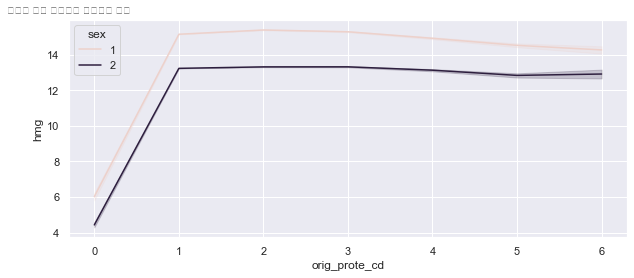

In [55]:
plt.figure(figsize = (10,4))
sns.lineplot(data=he, x="orig_prote_cd", y="hmg", hue="sex")
plt.rc('font', family='Malgun Gothic')
plt.title('성별에 따른 혈색소를 단백뇨로 구분', fontsize=10, fontweight='bold', position=(0, 0))
plt.show()


- 단백뇨가 1일때 헤모글로빈 수치가높고, 단백뇨가5,6 일때 헤모글로빈 수치가 낮아진다.
- 남자가 여자보다 헤모글로빈 수치가 높다
- 단백뇨 수치가 3이상이면 문제가 있는건데,,(잘모르겠음)

# 07. 다변량 분석 Multivariate Analysis

In [56]:
#선형회귀분석(다중)

X = health[['sex', 'age_group','smk','drk', 'orig_prote_cd']]
y = health['hmg']

X = sm.add_constant(X)

# 다중회귀분석 모형 적합
model = sm.OLS(y, X)
result = model.fit()

# 회귀분석 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    hmg   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                 8.375e+04
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:22:16   Log-Likelihood:            -1.9274e+06
No. Observations:             1000000   AIC:                         3.855e+06
Df Residuals:                  999994   BIC:                         3.855e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.8001      0.016   1142.030

##### 회귀식
hmg = -1.7752* 'sex' -0.1502 * 'age_group' + 0.1035 * 'smk'+ 0.1074 * 'drk'+ 0.4606*'orig_prote_cd' + 18.36690455063659
  
- 연령대가 높아질수록,성별에 따라 혈색소 수치가 낮아질 가능성 있음 
- 단백뇨 수치가 높을수록,음주,흡연여부에 따라 혈색소 수치가 높아질 가능성 있음

### 08. 이상치 탐지 Outlier Detection
- 데이터셋에서 이상치를 탐지하고 적절히 처리합니다.

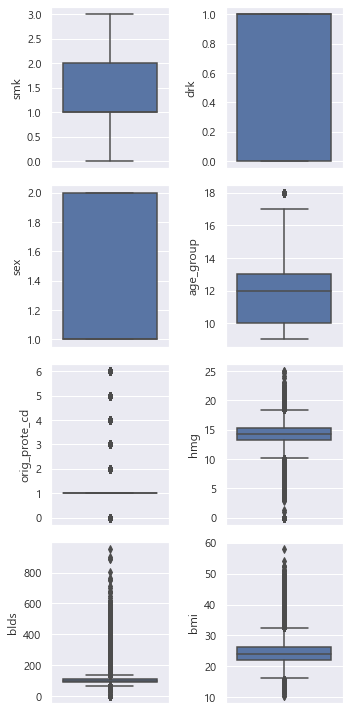

In [57]:
fig, axes = plt.subplots(4,2, figsize = (5,10))

sns.boxplot(y = health['smk'], ax = axes[0][0])
sns.boxplot(y = health['drk'], ax = axes[0][1])

sns.boxplot(y = health['sex'], ax = axes[1][0])
sns.boxplot(y = health['age_group'], ax = axes[1][1])

sns.boxplot(y = health['orig_prote_cd'], ax = axes[2][0])
sns.boxplot(y = health['hmg'], ax = axes[2][1])

sns.boxplot(y = health['blds'], ax = axes[3][0])
sns.boxplot(y = health['bmi'], ax = axes[3][1])

plt.tight_layout()
plt.show()


In [ ]:
q1 = titanic['age'].quantile(0.25)
q3 = titanic['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [ ]:
titanic['age'].describe()

In [ ]:
titanic.loc[titanic['age'] < lower_bound, 'age'] = titanic['age'].median()
titanic.loc[titanic['age'] > upper_bound, 'age'] = titanic['age'].median()

In [ ]:
titanic['age'].describe()

### 09. 데이터 변환 Data Transformation
- 스케일링, 인코딩, 결측치 처리 등을 적용하여 데이터를 변환합니다.
- 각 데이터의 특성에 따라 처리방법에 대하여 적합한 방법을 선택합니다.
- 스케일링 방법 
>- Min-Max Scaling : 데이터를 최소값과 최대값을 이용하여 0과 1 사이의 범위로 조정하는 방법입니다.
>- Standard Scaling : 데이터의 평균값과 표준편차를 이용하여 표준정규분포 형태로 조정하는 방법입니다.
>- MaxAbs Scaling : 데이터의 최대절대값을 이용하여 -1과 1 사이의 범위로 조정하는 방법입니다.
>- Robust Scaling : Median과 Interquartile range(IQR)를 이용하여 이상치(outlier)에 영향을 받지 않고 Scaling하는 방법입니다.
>- Power Transform : 데이터의 분포가 비대칭(skewed)한 경우, 분포를 정규분포와 같은 형태로 조정하는 방법입니다.
- 인코딩 방법(범주형 변수)
>- One-hot Encoding : 범주형 변수를 이진형 변수로 변환하는 방법입니다. 2개 이상인 경우에는 사용하는 것이 좋습니다.
>- Label Encoding : 범주형 변수의 각 값에 고유한 정수를 부여하는 방법입니다. 정수값이 모델에 영향을 미칠 수 있지만 변수의 값이 매우 많은 경우에는 고려해볼 수도 있습니다.
- 결측치 처리 방법
>- 결측치가 있는 데이터 행 삭제 : 결측치가 있는 데이터 행을 삭제하는 방법입니다. 하지만 이 경우 데이터의 양이 많지 않을 때는 유용할 수 있지만, 결측치가 많은 경우 데이터의 손실이 크게 일어날 수 있습니다.
>- 평균값으로 대체: 결측치가 있는 특성의 평균값으로 결측치를 대체하는 방법입니다. 이 방법은 결측치가 일부인 경우 유용할 수 있습니다.
>- 중앙값으로 대체: 결측치가 있는 특성의 중앙값으로 결측치를 대체하는 방법입니다. 이 방법은 이상치가 있을 때 유용할 수 있습니다.
>- 최빈값으로 대체: 결측치가 있는 특성의 최빈값으로 결측치를 대체하는 방법입니다. 이 방법은 범주형 데이터에서 유용합니다.
>- 다른 특성의 값으로 대체: 다른 특성의 값에 따라 결측치를 대체하는 방법입니다. 예를 들어, 같은 그룹에 속한 데이터들의 평균값으로 결측치를 대체하는 것입니다.
>- 모델링을 통한 대체: 다른 특성을 이용하여 결측치를 예측하는 모델을 구축하여 결측치를 대체하는 방법입니다. 이 방법은 데이터 양이 많은 경우에 유용합니다.

In [ ]:
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

titanic['age'].fillna(titanic['age'].median(), inplace=True)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['variable'] = encoder.fit_transform(df['variable'])

from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df_imputed = imputer.fit_transform(df)

In [ ]:
print(titanic.describe())

### 10. 결론 Conclusion
- EDA 과정에서 발견한 결과와 인사이트를 요약합니다.

In [ ]:
sns.catplot(y='bill_length_mm',x='species',hue='island',col='sex',kind='box',data=penguins_dropna)
plt.show()
